## Import all Dependencies

In [480]:
from numpy.random import seed
seed(888)

import itertools

import tensorflow as tf
tf.random.set_seed(404)

import os
import numpy as np
import keras 

from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.callbacks import TensorBoard

from time import strftime

from sklearn.metrics import confusion_matrix

from IPython.display import display
from tensorflow.keras.preprocessing.image import array_to_img

import matplotlib.pyplot as plt

%matplotlib inline

## Constants

In [474]:
LOG_DIR = 'tensorboard_cifar_logs/' # Create a directory for tensorboard

LABEL_NAME = ['Plane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

IMAGE_WIDTH = 32
IMAGE_HEIGHT = 32
IMAGE_PIXELS = IMAGE_HEIGHT * IMAGE_WIDTH
COLOR_CHANNELS = 3
TOTAL_INPUTS = IMAGE_PIXELS * COLOR_CHANNELS
NR_CLASSES = 10

VALIDATION_SIZE = 10000
SMALL_TRAIN_SIZE = 1000

## Get the Data

In [400]:
(x_train_all, y_train_all), (x_test, y_test) = cifar10.load_data()

In [401]:
type(cifar10)

module

In [402]:
type(x_train_all)

numpy.ndarray

## Explore the Data

In [403]:
x_train_all[0].shape

(32, 32, 3)

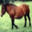

In [404]:
pic = array_to_img(x_train_all[7])
display(pic)

In [405]:
y_train_all.shape

(50000, 1)

In [406]:
y_train_all[7][0]

7

In [407]:
LABEL_NAME[y_train_all[7][0]]

'Horse'

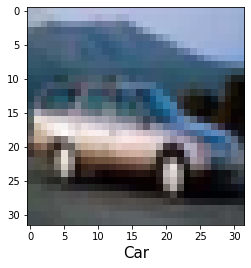

In [408]:
plt.imshow(x_train_all[4])

plt.xlabel(LABEL_NAME[y_train_all[4][0]], fontsize = 15)

plt.show()

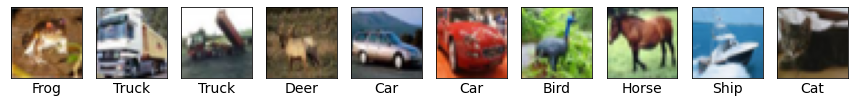

In [409]:
plt.figure(figsize = (15, 5))


for i in range(10):
    plt.subplot(1, 10, i + 1)
    
    plt.xticks([])               # empty square bracket means tick marks will be blank
    plt.yticks([])
    
    plt.xlabel(LABEL_NAME[y_train_all[i][0]], fontsize = 14)
    
    plt.imshow(x_train_all[i])

In [410]:
x_train_all.shape    # 4d array

(50000, 32, 32, 3)

In [411]:
nr_images, x, y, c = x_train_all.shape

print(f'images = {nr_images} \t | height = {y} \t | width = {x} \t | channels = {c}' )

images = 50000 	 | height = 32 	 | width = 32 	 | channels = 3


In [412]:
x_test.shape

(10000, 32, 32, 3)

## Preprocess Data

In [413]:
x_train_all[0][0][0]   # RGB channels

array([59, 62, 63], dtype=uint8)

In [414]:
x_train_all[0][0][0][0]

59

In [415]:
type(x_train_all[0][0][0][0])    # 8 bit unsigned(+) integer

numpy.uint8

In [416]:
# converting the array into small float 
x_train_all, x_test = x_train_all/255.0, x_test/255.0       # Red, green, blue = 255 max

In [417]:
x_train_all[0][0][0][0]

0.23137254901960785

In [418]:
x_train_all.shape

(50000, 32, 32, 3)

In [419]:
x_train_all.shape[0]

50000

In [420]:
x_train_all = x_train_all.reshape(x_train_all.shape[0], TOTAL_INPUTS)

In [421]:
x_train_all.shape

(50000, 3072)

In [422]:
x_train_all[0].ndim

1

In [423]:
x_train_all[0].shape

(3072,)

In [424]:
x_test[0][0][0]

array([0.62, 0.44, 0.19])

In [425]:
len(x_test)

10000

In [426]:
x_test.shape

(10000, 32, 32, 3)

In [427]:
x_test = x_test.reshape(x_test.shape[0], TOTAL_INPUTS)
print(f'The Shape of x_test is: {x_test.shape}')

The Shape of x_test is: (10000, 3072)


### Create Validation Dataset

In [428]:
x_val = x_train_all[:VALIDATION_SIZE]
y_val = y_train_all[:VALIDATION_SIZE]

In [429]:
print(x_val.shape, y_val.shape)

(10000, 3072) (10000, 1)


In [430]:
# Create the training dataset
x_train = x_train_all[VALIDATION_SIZE:]
y_train = y_train_all[VALIDATION_SIZE:]
print(x_train.shape, y_train.shape)

(40000, 3072) (40000, 1)


### Create a small dataset (for illustration)

In [431]:
x_train_xs = x_train[:SMALL_TRAIN_SIZE]
y_train_xs = y_train[:SMALL_TRAIN_SIZE]
print(x_train_xs.shape, y_train_xs.shape)

(1000, 3072) (1000, 1)


## Define the Neural Network using Keras

In [432]:
model_1 = Sequential([
    
    Dense(units = 128, input_dim = TOTAL_INPUTS, activation = 'relu', name = 'm1_hidden1'),
    Dense(units = 64, activation = 'relu', name = 'm1_hidden2'),
    Dense(units = 16, activation = 'relu', name = 'm1_hidden3'),
    Dense(units = 10, activation = 'softmax', name = 'mi_output')

])

model_1.compile(optimizer = 'adam',
                loss = 'sparse_categorical_crossentropy',
                metrics = ['accuracy'])

In [433]:
model_2 = Sequential()

model_2.add(Dropout(rate = 0.2, seed = 42, input_shape = (TOTAL_INPUTS,)))

model_2.add(Dense(128, activation = 'relu', name = 'm2_hidden1'))
model_2.add(Dense(64, activation = 'relu', name = 'm2_hidden2'))
model_2.add(Dense(16, activation = 'relu', name = 'm2_hidden3'))
model_2.add(Dense(10, activation = 'softmax', name = 'm2_output'))

model_2.compile(optimizer = 'adam',
                loss = 'sparse_categorical_crossentropy',
                metrics = ['accuracy'])

In [434]:
model_3 = Sequential()

model_3.add(Dropout(rate = 0.2, seed = 42, input_shape = (TOTAL_INPUTS,)))

model_3.add(Dense(128, activation = 'relu', name = 'm3_hidden1'))

model_3.add(Dropout(0.25, seed = 42))

model_3.add(Dense(64, activation = 'relu', name = 'm3_hidden2'))
model_3.add(Dense(16, activation = 'relu', name = 'm3_hidden3'))
model_3.add(Dense(10, activation = 'softmax', name = 'm3_output'))

model_3.compile(optimizer = 'adam',
                loss = 'sparse_categorical_crossentropy',
                metrics = ['accuracy'])

In [435]:
type(model_1)

keras.engine.sequential.Sequential

In [436]:
model_1.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 m1_hidden1 (Dense)          (None, 128)               393344    
                                                                 
 m1_hidden2 (Dense)          (None, 64)                8256      
                                                                 
 m1_hidden3 (Dense)          (None, 16)                1040      
                                                                 
 mi_output (Dense)           (None, 10)                170       
                                                                 
Total params: 402,810
Trainable params: 402,810
Non-trainable params: 0
_________________________________________________________________


In [437]:
# Calculation of params
32*32*3*128 + 128 + (128*64 + 64) + (64*16 +16) + (16 *10 +10)

402810

## Tensorboard (Visualising learning)

In [438]:
def get_tensorboard(model_name):

    folder_name = f'{model_name} at {strftime("%H %M")}' 
    #print(folder_name)

    dir_paths = os.path.join(LOG_DIR, folder_name)

    try:
        os.makedirs(dir_paths)
    except OSError as err:
        print(err.strerror)
    else:
        print('Successfully created directory')

    return TensorBoard(log_dir = dir_paths)

## Fit the Model 

In [439]:
samples_per_batch = 1000

In [440]:
#%%time 

#nr_epochs = 150

#model_1.fit(x_train_xs,
            #y_train_xs,
            #batch_size = samples_per_batch,
            #epochs= nr_epochs,
            #callbacks = [get_tensorboard('Model_1')],
            #verbose = 0, 
            #validation_data = (x_val, y_val))

In [441]:
%%time 

nr_epochs = 100

model_1.fit(x_train,
            y_train,
            batch_size = samples_per_batch,
            epochs= nr_epochs,
            callbacks = [get_tensorboard('Model_1 XL')],
            verbose = 0, 
            validation_data = (x_val, y_val))

Successfully created directory
CPU times: total: 9min 34s
Wall time: 1min 43s


In [442]:
%%time 

nr_epochs = 100

model_2.fit(x_train,
            y_train,
            batch_size = samples_per_batch,
            epochs= nr_epochs,
            callbacks = [get_tensorboard('Model_2 XL')],
            verbose = 0, 
            validation_data = (x_val, y_val))

Successfully created directory
CPU times: total: 19min 16s
Wall time: 2min 57s


In [443]:
%%time 

nr_epochs = 100

model_3.fit(x_train,
            y_train,
            batch_size = samples_per_batch,
            epochs= nr_epochs,
            callbacks = [get_tensorboard('Model_3 XL')],
            verbose = 0, 
            validation_data = (x_val, y_val))

Successfully created directory
CPU times: total: 19min 33s
Wall time: 2min 57s


In [444]:
#%%time 

#nr_epochs = 150

#model_2.fit(x_train_xs,
            #y_train_xs,
            #batch_size = samples_per_batch,
            #epochs= nr_epochs,
            #callbacks = [get_tensorboard('Model_2')],
            #verbose = 0, 
            #validation_data = (x_val, y_val))

## Prediction on Individual Images

In [445]:
x_val.shape   # x_val contain 10000 images and each image has 3072 pixels 

(10000, 3072)

In [446]:
print(x_val[0].shape)
# print(x_val[0])        # 1 image as a 1d numpy array

(3072,)


In [447]:
test = np.expand_dims(x_val[0], axis = 0)     # Expand from 1d to 2d array
test.shape 

(1, 3072)

In [448]:
np.set_printoptions(precision=2)

In [449]:
prediction = model_2.predict(test)      # each image has 10 prediction

1/1 [==============================] - 0s 254ms/step


In [450]:
prediction.sum()      # sum should be 1

0.99999994

In [451]:
model_2.predict(x_val).shape

313/313 [==============================] - 3s 9ms/step


(10000, 10)

In [452]:
np.argmax(prediction, axis=1)

array([6], dtype=int64)

In [453]:
y_val[0]

array([6], dtype=uint8)

In [455]:
# prediction for first 10 images(around 50% prediction will be correct)

for i in range(10):
    test_img = np.expand_dims(x_val[i], axis = 0)
    prediction = model_2.predict(test_img)
    predicted_val = np.argmax(prediction, axis=1)[0]
    print(f'Actual value: {y_val[i][0]} vs. Predicted value: {predicted_val}')
    

1/1 [==============================] - 0s 102ms/step
Actual value: 6 vs. Predicted value: 6
1/1 [==============================] - 0s 43ms/step
Actual value: 9 vs. Predicted value: 9
1/1 [==============================] - 0s 60ms/step
Actual value: 9 vs. Predicted value: 9
1/1 [==============================] - 0s 51ms/step
Actual value: 4 vs. Predicted value: 6
1/1 [==============================] - 0s 40ms/step
Actual value: 1 vs. Predicted value: 0
1/1 [==============================] - 0s 47ms/step
Actual value: 1 vs. Predicted value: 7
1/1 [==============================] - 0s 36ms/step
Actual value: 2 vs. Predicted value: 2
1/1 [==============================] - 0s 45ms/step
Actual value: 7 vs. Predicted value: 7
1/1 [==============================] - 0s 43ms/step
Actual value: 8 vs. Predicted value: 8
1/1 [==============================] - 0s 43ms/step
Actual value: 3 vs. Predicted value: 4


## Evaluation

In [456]:
model_2.metrics_names

['loss', 'accuracy']

In [460]:
test_loss, test_accuracy = model_2.evaluate(x_test, y_test)
print(f'Test loss is: {test_loss:0.3} and test accuracy is:{test_accuracy:0.1%}')

313/313 [==============================] - 1s 2ms/step - loss: 1.4509 - accuracy: 0.4821
Test loss is: 1.45 and test accuracy is:48.2%


In [463]:
new_prediction = model_2.predict(x_test)
# confution matrix from sklearn
conf_matrix = confusion_matrix(y_true = y_test, y_pred = np.argmax(new_prediction, axis=1))


313/313 [==============================] - 1s 2ms/step


In [465]:
conf_matrix.shape

(10, 10)

In [466]:
nr_rows = conf_matrix.shape[0]
nr_cols = conf_matrix.shape[1]

In [467]:
conf_matrix.max()

689

In [469]:
conf_matrix.min()

7

In [481]:
conf_matrix[0]

array([534,  14,  75,  10,  84,  22,  31,  19, 185,  26], dtype=int64)

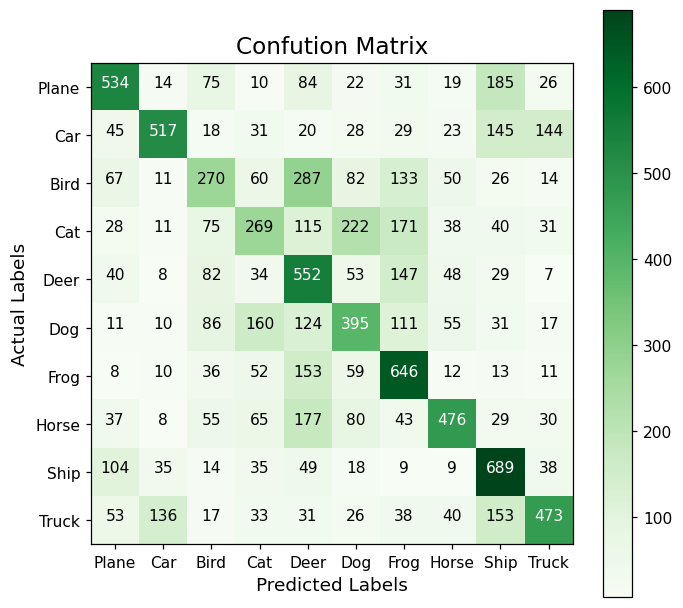

In [494]:
plt.figure(figsize=(7,7), dpi = 111)
plt.imshow(conf_matrix, cmap = plt.cm.Greens)

plt.title('Confution Matrix', fontsize = 15)
plt.xlabel('Predicted Labels', fontsize = 12)
plt.ylabel('Actual Labels', fontsize = 12)

tick_marks = np.arange(NR_CLASSES)
plt.yticks(tick_marks, LABEL_NAME)
plt.xticks(tick_marks, LABEL_NAME)

plt.colorbar()

# Nested for loop to print each green box value (using itertools)

for i, j in itertools.product(range(nr_rows), range(nr_cols)):
    plt.text(j, i, conf_matrix[i, j], horizontalalignment = 'center',
            color = 'white' if conf_matrix[i, j] > conf_matrix.max()/2 else 'black')
    

plt.show()

In [495]:
# True positive along the diagonal
np.diag(conf_matrix)

array([534, 517, 270, 269, 552, 395, 646, 476, 689, 473], dtype=int64)

In [496]:
recall = np.diag(conf_matrix) / np.sum(conf_matrix, axis = 1)
recall

array([0.53, 0.52, 0.27, 0.27, 0.55, 0.4 , 0.65, 0.48, 0.69, 0.47])

In [497]:
precision = np.diag(conf_matrix) / np.sum(conf_matrix, axis = 0)
precision

array([0.58, 0.68, 0.37, 0.36, 0.35, 0.4 , 0.48, 0.62, 0.51, 0.6 ])

In [498]:
# Average recall for whole model
avg_recall = np.mean(recall)
print(f'Model 2 recall score is: {avg_recall:.2%}')

Model 2 recall score is: 48.21%


In [499]:
# Average precision for whole model
avg_precision = np.mean(precision)
print(f'Model 2 precision score is: {avg_precision:.2%}')

Model 2 precision score is: 49.40%


In [500]:
# Calculate the F-score

F_score = 2 * (avg_precision * avg_recall) / (avg_precision + avg_recall)
print(f'Model 2 F-score is: {F_score:.2%}')

Model 2 F-score is: 48.80%
